<a href="https://colab.research.google.com/github/toshi47/SOM/blob/main/minisom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install minisom
from minisom import MiniSom
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'numpy.ndarray'>
(500, 784)


In [23]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(type(train_X[0]))
train_X=train_X[:500]
num=train_y[:500]
train_X=np.reshape(train_X,(500,784))
print(train_X.shape)

<class 'numpy.ndarray'>
(500, 784)


In [37]:
# Initializing neurons and Training
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
data=train_X
data = scale(data)
n_neurons = 5
m_neurons = 5


In [38]:
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

/usr/local/lib/python3.7/dist-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 19.693623506061062


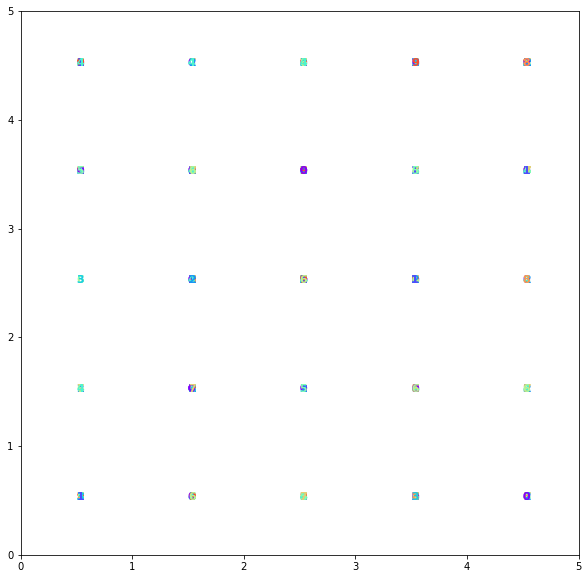

In [39]:
plt.figure(figsize=(10, 10))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
#plt.savefig('resulting_images/som_digts.png')
plt.show()

In [26]:
from sklearn import datasets
# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.9937983495949725


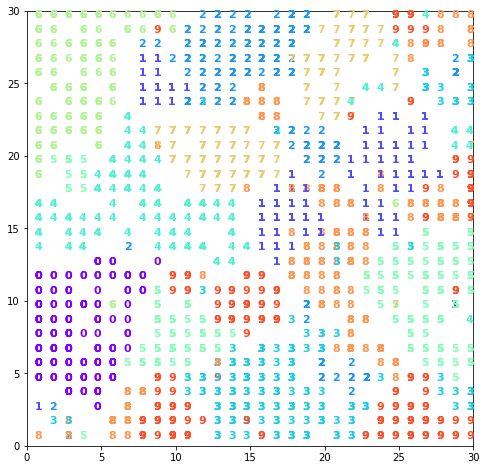

In [28]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

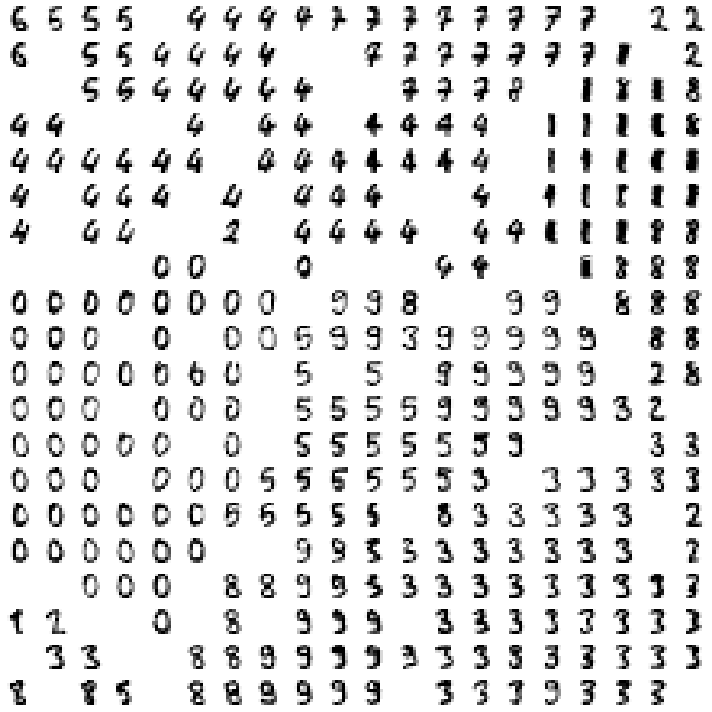

In [29]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.show()